**Hubble's test for the space distribution**

In this notebook, we will try a relation between flux of radio sources and source counts. The aim is to find whether we can derive a simple relation between radio source counts and flux. The idea is based on PoPC, page 20 onward. Before getting into the derivation and analysis, let us import the necessary python packages :D 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
plt.rcParams.update({'font.size': 22})

 Consider a (hypothetical) Universe with identical sources distributed homogenously and isotropically. All the sources have constant luminosity. So, if we are looking from our place in the Universe, with a telescope with limited angular resolution and sensitivity, we will see a few sources. However, if we increase our sensitivity we will see sources that are fainter. As we know, sources appear "fainter" when they are farther from us due to lower number of photons reaching us. Therefore the number of sources that our telescope will also increase with increased sensitivity, as our telescope now "surveys" a larger volume. How do we quantify this and derive a relation ?

Assume we have $n$ sources per unit volume, each with luminosity $L$. A sphere of radius $r$ with our telescope at the centre will have $n\frac{4\pi r^3}{3}$ such sources. However, a sphere projects $4\pi$ steradians of solid angle, so we see that we have $N = \frac{n r^3}{3}$ sources per solid angle upto a distance $r$. What sets $r$ ? The telescope sensitivity. 

Each source has luminosity $L$, so the relation between flux that we observe and the distance to source is $f = \frac{L}{4\pi r^2}$ which can be rearranged to get $r = \big(\frac{L}{4\pi f}\big)^\frac{3}{2}$. Substitute this in equation for $N$ and we get $N = \frac{n}{3} \big(\frac{L}{4\pi f}\big)^\frac{3}{2}$. Or we can say the $N \propto f^\frac{-3}{2}$

What does this mean ? Remember that if set a limit on the flux, it sets a limit to the distance that we "survey". So, if we look only for sources with high flux, the number of them will be small. If we start looking for fainter sources, we have see them in larger numbers with the relation given above. Let us now test this hypothesis. 

I will use a radio survey to do this test, the famous 3C catalogue. The 3C catalogue used is in this notebook is obtained from vizier as per 
https://astronomy.stackexchange.com/questions/24038/is-there-a-complete-edition-of-the-cambridge-catalogue-of-radio-sources-esp-3c

NB : I may use the term flux and flux density interchangeably in this notebook, however they are not the same !

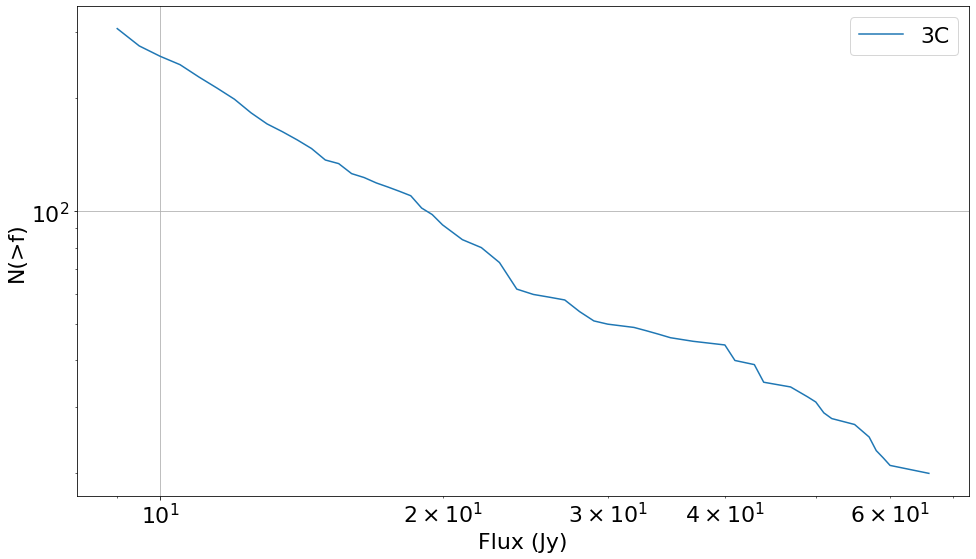

In [2]:
flux_d = np.loadtxt("./DATA/3C_catalogue.txt", usecols=9) #Loading the source fluxes

sorted_flux_d_full = np.sort(flux_d) #Sorting the fluxes
no_noise_index = np.where(sorted_flux_d_full>5)[0] #Finding indices of sources with > 5 Jy flux 
sorted_flux_d = sorted_flux_d_full[no_noise_index] #Only sources with f > 5 Jy considered

source_counts = np.array([])
l_flux_array = np.array([])

for l_flux in sorted_flux_d[0:-20]:
    l_flux_array = np.append(l_flux_array, l_flux) #Appending to an array of flux limits
    source_count_here = len(np.where(sorted_flux_d>l_flux)[0]) #Counting number of sources with fluxes > l_flux 
    source_counts = np.append(source_counts, source_count_here) #Appending to an array the counts

plt.figure(figsize=(16,9))
plt.loglog(l_flux_array, source_counts, label="3C")
plt.xlabel("Flux (Jy)")
plt.ylabel("N(>f)")
plt.grid()
plt.legend(loc='best')

If we do the math, we can see that $log(N) \propto -1.5log(f)$. In the above plot, I have plotted $log(f)~vs~log(N)$ and the relation seems to be linear in log-log space, as we expects. What is the relation here ? Let us find out by fitting a line to $log(f)~vs~log(N)$ and looking at the coefficients !

In [3]:
sc_fit = np.polyfit(np.log(l_flux_array), np.log(source_counts), 1)
print(sc_fit)

[-1.39996849  8.75627709]


The coefficient that we are looking for is $-1.39996849$, which is resonably close to $-1.5$ that we expect ! Don't forget that we made several simplifying assumptions when we derived the relation. Also, 3C catalogue is quite small and has sources in 100s and not 1000s. Why don't we try a larger catalogue ?

We will now use a catalogue called Arecibo Legacy Fast ALFA (ALFALFA) http://egg.astro.cornell.edu/index.php/, with data obtained from http://egg.astro.cornell.edu/alfalfa/data/a100files/a100.code12.table2.190808.csv
It is a HI 21 cm survey (i.e. around 1420 MHz and not cosmic dawn/epoch of re-ionisation redshifted 21 cm) and has a huge number of sources. Let us load the data, and perform the sorting and counting as we did earlier. Also, let us plot the results of ALFALFA along with 3C.

Number of 3C sources used: 327
Number of ALFALFA used: 20479


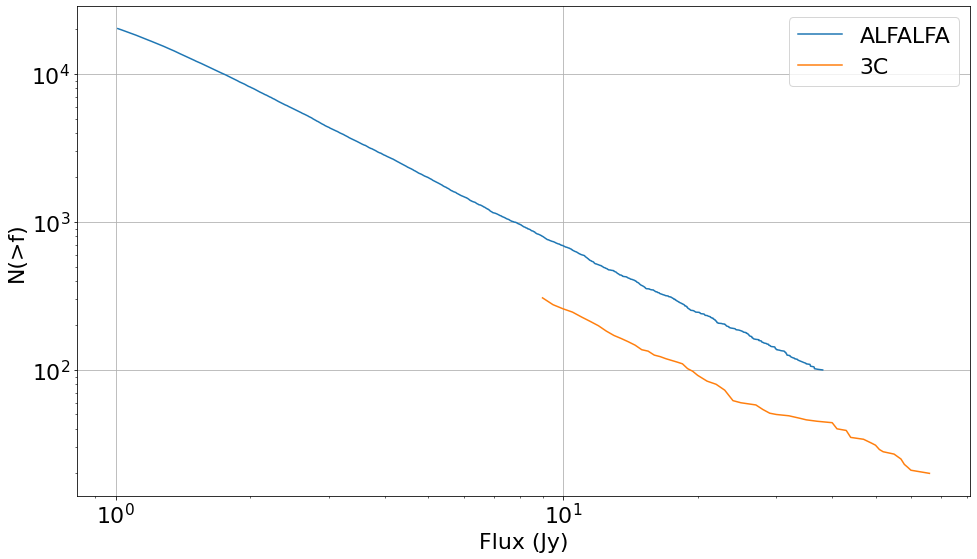

In [4]:
HI_flux_array = np.array([])

with open("./DATA/a100.code12.table2.190808.csv", 'r') as file:
    csv_file = csv.DictReader(file)
    for row in csv_file:
        HI_flux_array = np.append(HI_flux_array, row['HIflux'])
        
HI_flux_array = np.asfarray(HI_flux_array)

sorted_HI_flux_d_full = np.sort(HI_flux_array)
no_noise_index = np.where(sorted_HI_flux_d_full>1)[0] #Finding indices of sources with > 1 Jy HI_flux 
sorted_HI_flux_d = sorted_HI_flux_d_full[no_noise_index] #Only sources with f > 1 Jy considered

source_counts_HI = np.array([])
l_HI_flux_array = np.array([])

for l_HI_flux in sorted_HI_flux_d[0:-100]:
    l_HI_flux_array = np.append(l_HI_flux_array, l_HI_flux) #Appending to an array of HI_flux limits
    source_count_here = len(np.where(sorted_HI_flux_d>l_HI_flux)[0]) #Counting number of sources with HI_fluxes > l_HI_flux 
    source_counts_HI = np.append(source_counts_HI, source_count_here) #Appending to an array the counts

plt.figure(figsize=(16,9))
plt.loglog(l_HI_flux_array, source_counts_HI, label="ALFALFA")
plt.loglog(l_flux_array, source_counts, label="3C")
plt.xlabel("Flux (Jy)")
plt.ylabel("N(>f)")
plt.grid()
plt.legend(loc='best')

print ("Number of 3C sources used:",len(sorted_flux_d))
print ("Number of ALFALFA used:",len(sorted_HI_flux_d))

Beautiful ! Let us look at the polyfit coefficients for ALFALFA.

In [5]:
sc_fit_HI = np.polyfit(np.log10(l_HI_flux_array), np.log10(source_counts_HI), 1)
print (sc_fit_HI)

[-1.49139089  4.34642284]


A coefficient of $\sim -1.49$ ! If you were to ask me, this is as good as $-1.5$ that we expect. Note that we we used more than $20000$ sources in ALFALFA analysis and just $300+$ in 3C, so the data are much larger in size and hence we get more reliable results compared to 3C (from a statistics point of view).